# part4- 시각화도구

## 왜 시각화 도구를 사용해서 데이터를 보여줄까?

- 데이터 분석에 다루는 데이터 종류가 다양하다. 크기가 너무 나도 다양하다.
- 시각화도구 즉, 그래프를 이용하면 데이터의 구조와 패턴을 파악하기 용이하다. 또한 다양한 관점에서 데이터에 대한 통찰력을 제공할 수 있다.
- 판다스는 데이터 시각화를 지원하는 내장 기능이 있지만, 풍부하지 않기 때문에 시각화 전문 도구인 **Matplotlib** 을 사용한다.
- 파이썬 표준 시각화 도구라고 불리우며 2D 평면 그래프에 관한 다양한 포멧과 기능을 제공한다. 객체지향 프로그래밍을 지원한다.

## Matplotlib

### 선 그래프

- line plot은 연속하는 데이터 값들을 직선 또는 곡선으로 연결하여 데이터값 사이의 관계를 나타낸다.
- 특히 시계열 데이터와 같이 연속적인 값의 변화와 패턴을 파악하는데 적합

In [4]:
import warnings
warnings.filterwarnings('ignore') # 각종 warning 무시하기

In [2]:
# 시도 간의 인구 이동 데이터 셋을 활용
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt #약칭을 쓴다는 점 유의

# 엑셀 데이터를 데이터프레임으로 변환
df = pd.read_excel('./시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

In [3]:
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


### 데이터 처리

- '전출지별' 열에는 NaN 값이 다수 들어가 있다. 이는 널값은 엑셀 파일에서 병합된 셀을 데이터프레임으로 변환할 때 적절한 값을 찾지 못해서 발생한 것이다.
- fillna() 메소드를 활용해서 method='ffill' 옵션을 사용해 누락데이터가 들어 있는 행의 바로 앞에 위치한 행의 데이터 값으로 채운다. 2행을 예로들면 1행의 데이터를 대체한다는 것이다.
- '전출지별' 열에서 '서울특별시' 라는 값을 갖는 데이터만 추출하여 변수 df_seoul에 저장을 할것이다. 
- '전입자별' 열이름을 '전입지'로 바꾸고, '전입지'별 열을 df_seoul의 행 인덱스로 지정하자.

In [7]:
# fillna메소드를 활용해서 널값 대체
df = df.fillna(method='ffill')

# '서울특별시' 값을 갖는 데이터만 필터링해서 데이터프레임에 저장
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1) # 전출지명 컬럼 삭제
df_seoul.rename({'전입지별' : '전입지'}, axis=1, inplace=True) #열이름 변경
df_seoul.set_index('전입지', inplace=True) # 전입지 열을 행 인덱스로 지정

In [8]:
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


- df_seoul에서 '전입지'가 '경기도'인 행 데이터를 선택하여 sr_one에 저장한다. 서울에서 경기도로 이동한 인구 데이터를 나타내자

In [9]:
sr_one = df_seoul.loc['경기도']

In [11]:
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

선 그래프로 그리는 plot() 함수에 입력할 x,y축 데이터를 선택한다. 시리즈의 인덱스를 x축, 데이터 값을 y축으로 표현해보자.

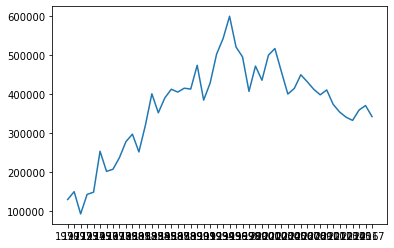

In [12]:
plt.plot(sr_one.index, sr_one.values)

시리즈 또는 데이터프레임 객체를 plot() 함수에 직접 넣는 것도 가능하다.

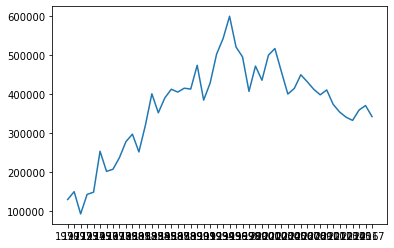

In [13]:
plt.plot(sr_one)

동일한 결과값을 얻을 수 있다.

- 차트 제목, 축 이름 추가: 그래프 객체에 차트 제목을 추가할 때는 title()함수를 사용한다. x축이름은 xlabel(), y축은 ylabel() 함수 이용

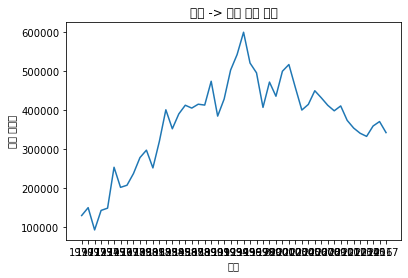

In [21]:
plt.plot(sr_one.index, sr_one.values)
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show() #변경 사항을 저장하고 그래프로 출력

현재 한글 폰트 오류가 발생 한것으로 보인다. 이것을 해결하기 위해서 한글 폰트파일을 다운받아서 파이선 파일과 같은 폴더로 저장 후 다음 코드를 추가

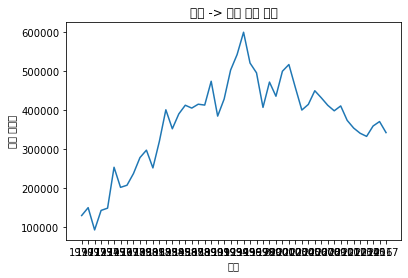

In [5]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"  #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine= 'openpyxl', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력

- 아직 되지않았다 나는 지금 리눅스os 체계에서 진행을 하다보니 리눅스기반에서 matplotlib 한글 오류에대해 서칭 후 진행했다.   
참고 url: https://velog.io/@redgreen/Linux-linux%EC%97%90%EC%84%9C-Matplotlib-%ED%95%9C%EA%B8%80%ED%8F%B0%ED%8A%B8-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0

In [10]:
#폰트 목록 확인하기
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

['NanumMyeongjo',
 'NanumMyeongjo Eco',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumGothicCoding',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquare',
 'NanumSquare',
 'Nanum Brush Script',
 'Nanum Pen Script',
 'NanumSquareRound',
 'NanumGothic Eco',
 'NanumSquareRound',
 'NanumSquare',
 'NanumBarunpen',
 'NanumGothic',
 'NanumGothic',
 'NanumMyeongjo Eco',
 'NanumGothic Eco',
 'NanumBarunpen',
 'NanumGothic',
 'NanumGothic Eco',
 'NanumMyeongjo',
 'NanumMyeongjo Eco',
 'NanumBarunGothic',
 'NanumGothicCoding',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumSquare']

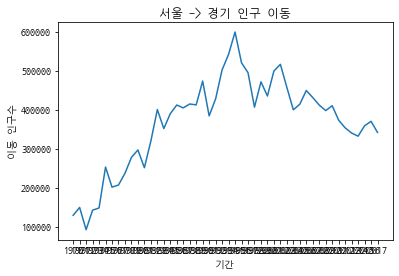

In [11]:
# 전역 폰트 적용하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicCoding')

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine= 'openpyxl', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력

- 그래프 꾸미기: x축 눈금 라벨의 글씨가 잘 보이지 않는 문제를 해결하는 방법을 알아보자.
- 눈금라벨이 들어갈 만한 충분한 여유 공간이 없어서 발생하는 문제이다.
- 공간확보: figure() 함수를 이용해서 그림틀의 사이즈를 조정해준다
- 눈금 글씨 돌리기: xticks() 함수를 활용해서 x축 눈금 라벨을 반시계방향으로 90도 회전을 시킴.

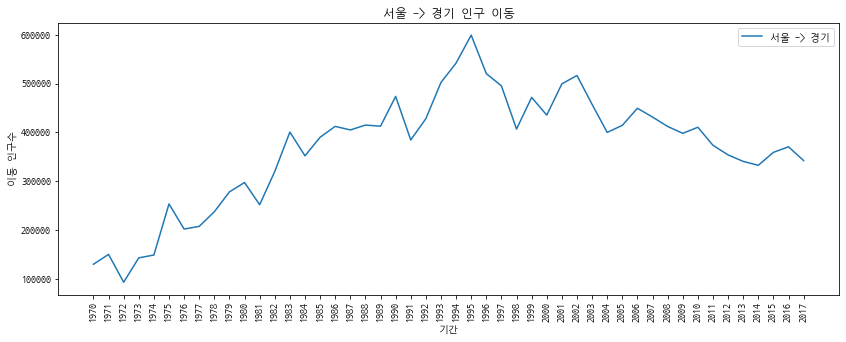

In [18]:
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

이제 그래프를 보기가 좀더 용이하다.

- matplotlib 스타일 서식 지정: 색, 폰트 등 디자인적 요소를 사전에 지정된 스타일로 일괄 변경 가능.
- 단 스타일 서식을 지정하는 것은 matplotlib 실행 환경설정을 변경하는 것으로 다른 파일을 실행 할 때도 계속 적용된다는 점을 유의해야함.
- ggplot으로 스타일 서식시정, xticks 에 size=10 옵션 추가적용(폰트크기), plot() 함수에 marker='o'적용, markersize는 10으로 지정

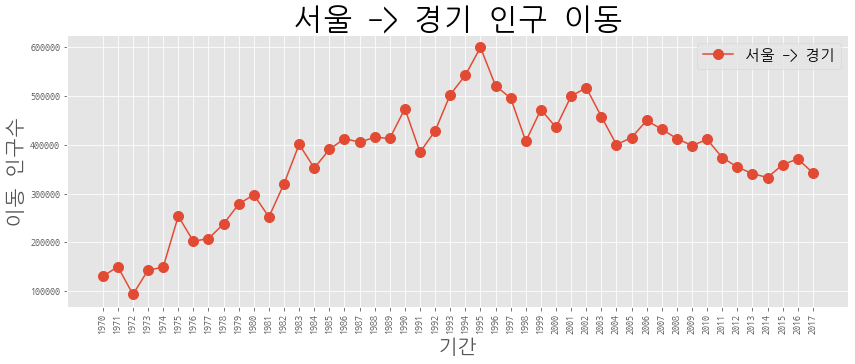

In [20]:
# 스타일 서식 지정
plt.style.use('ggplot')

# 그림사이즈 설정
plt.figure(figsize=(14,5))

#x축 눈금 회전, 폰트크기 설정
plt.xticks(size=10, rotation='vertical')

# x,y축 데이터 plot함수 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

plt.title('서울 -> 경기 인구 이동', size=30)  #차트 제목
plt.xlabel('기간', size=20)                  #x축 이름
plt.ylabel('이동 인구수', size=20)           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력


matplotlib 스타일 서식 종류

In [21]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


- 그래프에 대한 설명을 덧붙이는 주석: annotate() 함수를 사용하면 된다.

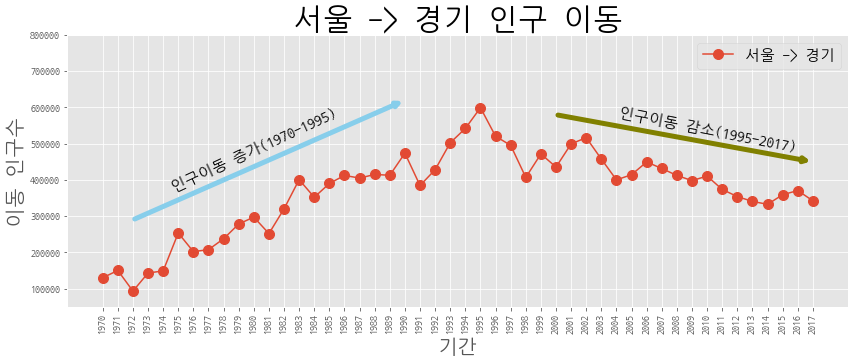

In [31]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot') 

# 그림 사이즈 늘리기
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)  # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)  #차트 제목
plt.xlabel('기간', size=20)                  #x축 이름
plt.ylabel('이동 인구수', size=20)           #y축 이름

#범례 표시
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),       #화살표의 머리 부분(끝점)(인덱스번호, 인구수)
             xytext=(2, 290000),    #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), #화살표 서식
             )

plt.annotate('',
             xy=(47, 450000),       #화살표의 머리 부분(끝점)
             xytext=(30, 580000),   #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5),  #화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',  #텍스트 입력
             xy=(10, 370000),            #텍스트 위치 기준점
             rotation=25,                #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.annotate('인구이동 감소(1995-2017)',  #텍스트 입력
             xy=(40, 480000),            #텍스트 위치 기준점
             rotation=-11,               #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.show()  # 변경사항 저장하고 그래프 출력
